Checking every iteration of the raw data to try and find the 20Hz/30Hz tags.

In [12]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from intermodulation.freqtag_spec import TRIGGERS
from intermodulation.utils import nested_iteritems

mne.set_config("MNE_BROWSER_BACKEND", "matplotlib")
%matplotlib inline

# Load the epoched data
datapath = Path("C:/Users/gerce/Documents/Projects/results/syntax_im/241018/")
events = mne.read_events(datapath / "pilot03-eve.fif")
events1w = events[np.isin(events[:, 2], np.arange(40, 50))]
usedtrigs = np.unique(events[:, 2])
triglabels = {"/".join(k): v for k, v in nested_iteritems(TRIGGERS) if v in usedtrigs}
target_evok = ["F1", "F2"]

# Load raw data with only cHPI and line noise filtering, epoch, and compute PSD on 1-word task
rawfile = datapath / "pilot03_cHPI_line_preproc.fif"
raw = mne.io.read_raw_fif(rawfile, preload=True)
epochs_chpiline = mne.Epochs(raw, events, event_id=triglabels, tmin=-0.2, tmax=2.0, preload=True)
del raw
spect_chpiline = epochs_chpiline["F1"].compute_psd(fmax=70, n_jobs=-1)
evokeds_chpiline = []
for evok in target_evok:
    evokeds_chpiline.append(epochs_chpiline[evok].average())
del epochs_chpiline

# As above, but for SSS filtering also
rawfile = datapath / "pilot03_cHPI_line_sss.fif"
raw = mne.io.read_raw_fif(rawfile, preload=True)
epochs_sss = mne.Epochs(raw, events, event_id=triglabels, tmin=-0.2, tmax=2.0, preload=True)
del raw
spect_sss = epochs_sss["F1"].compute_psd(fmax=70, n_jobs=-1)
evokeds_sss = []
for evok in target_evok:
    evokeds_sss.append(epochs_sss[evok].average())
del epochs_sss

# As above, but for the AutoReject epochs which have excluded trials and "repairing" of the data
# epochfile = datapath / "pilot03-preproc-1w-epo-autorej.fif"
# epochs_arj = mne.read_epochs(epochfile)
# spect_arj = epochs_arj["F1"].compute_psd(fmax=70, n_jobs=-1)
# evokeds_arj = []
# for evok in target_evok:
#     evokeds_arj.append(epochs_arj[evok].average())
# del epochs_arj


Opening raw data file C:\Users\gerce\Documents\Projects\results\syntax_im\241018\pilot03_cHPI_line_preproc.fif...
    Read a total of 17 projection items:
        ssp_combined_0_68deg (1 x 306)  idle
        ssp_combined_1_68deg (1 x 306)  idle
        ssp_combined_2_68deg (1 x 306)  idle
        ssp_combined_3_68deg (1 x 306)  idle
        ssp_combined_4_68deg (1 x 306)  idle
        ssp_combined_5_68deg (1 x 306)  idle
        ssp_combined_6_68deg (1 x 306)  idle
        ssp_combined_7_68deg (1 x 306)  idle
        ssp_combined_8_68deg (1 x 306)  idle
        ssp_combined_9_68deg (1 x 306)  idle
        ssp_combined_10_68deg (1 x 306)  idle
        ssp_combined_11_68deg (1 x 306)  idle
        ssp_combined_12_68deg (1 x 306)  idle
        ssp_combined_13_68deg (1 x 306)  idle
        ssp_combined_14_68deg (1 x 306)  idle
        ssp_combined_15_68deg (1 x 306)  idle
        ssp_combined_16_68deg (1 x 306)  idle
    Range : 19000 ... 1797999 =     19.000 ...  1797.999 secs
Ready.
Open

C:\Users\gerce\AppData\Local\Temp\ipykernel_22000\1781732707.py:21: RuntimeWarning: This filename (C:\Users\gerce\Documents\Projects\results\syntax_im\241018\pilot03_cHPI_line_preproc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(rawfile, preload=True)


Ready.
Reading 0 ... 2655999  =      0.000 ...  2655.999 secs...
Not setting metadata
4054 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 17)
17 projection items activated
Using data from preloaded Raw for 4054 events and 2201 original time points ...
6 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


KeyError: 'Event name "F2" could not be found. The following events are present in the data: STATEEND, ITI, FIXATION, BREAK, QUERY/TRUE/F1LEFT, QUERY/FALSE/F1LEFT, TWOWORD/PHRASE/F1LEFT, TWOWORD/PHRASE/F1RIGHT, TWOWORD/NONPHRASE/F1LEFT, TWOWORD/NONPHRASE/F1RIGHT, TWOWORD/NONWORD/F1LEFT, TWOWORD/NONWORD/F1RIGHT, ONEWORD/WORD/F1, ONEWORD/NONWORD/F1'

Averaging across epochs before plotting...
Averaging across epochs before plotting...
Averaging across epochs before plotting...


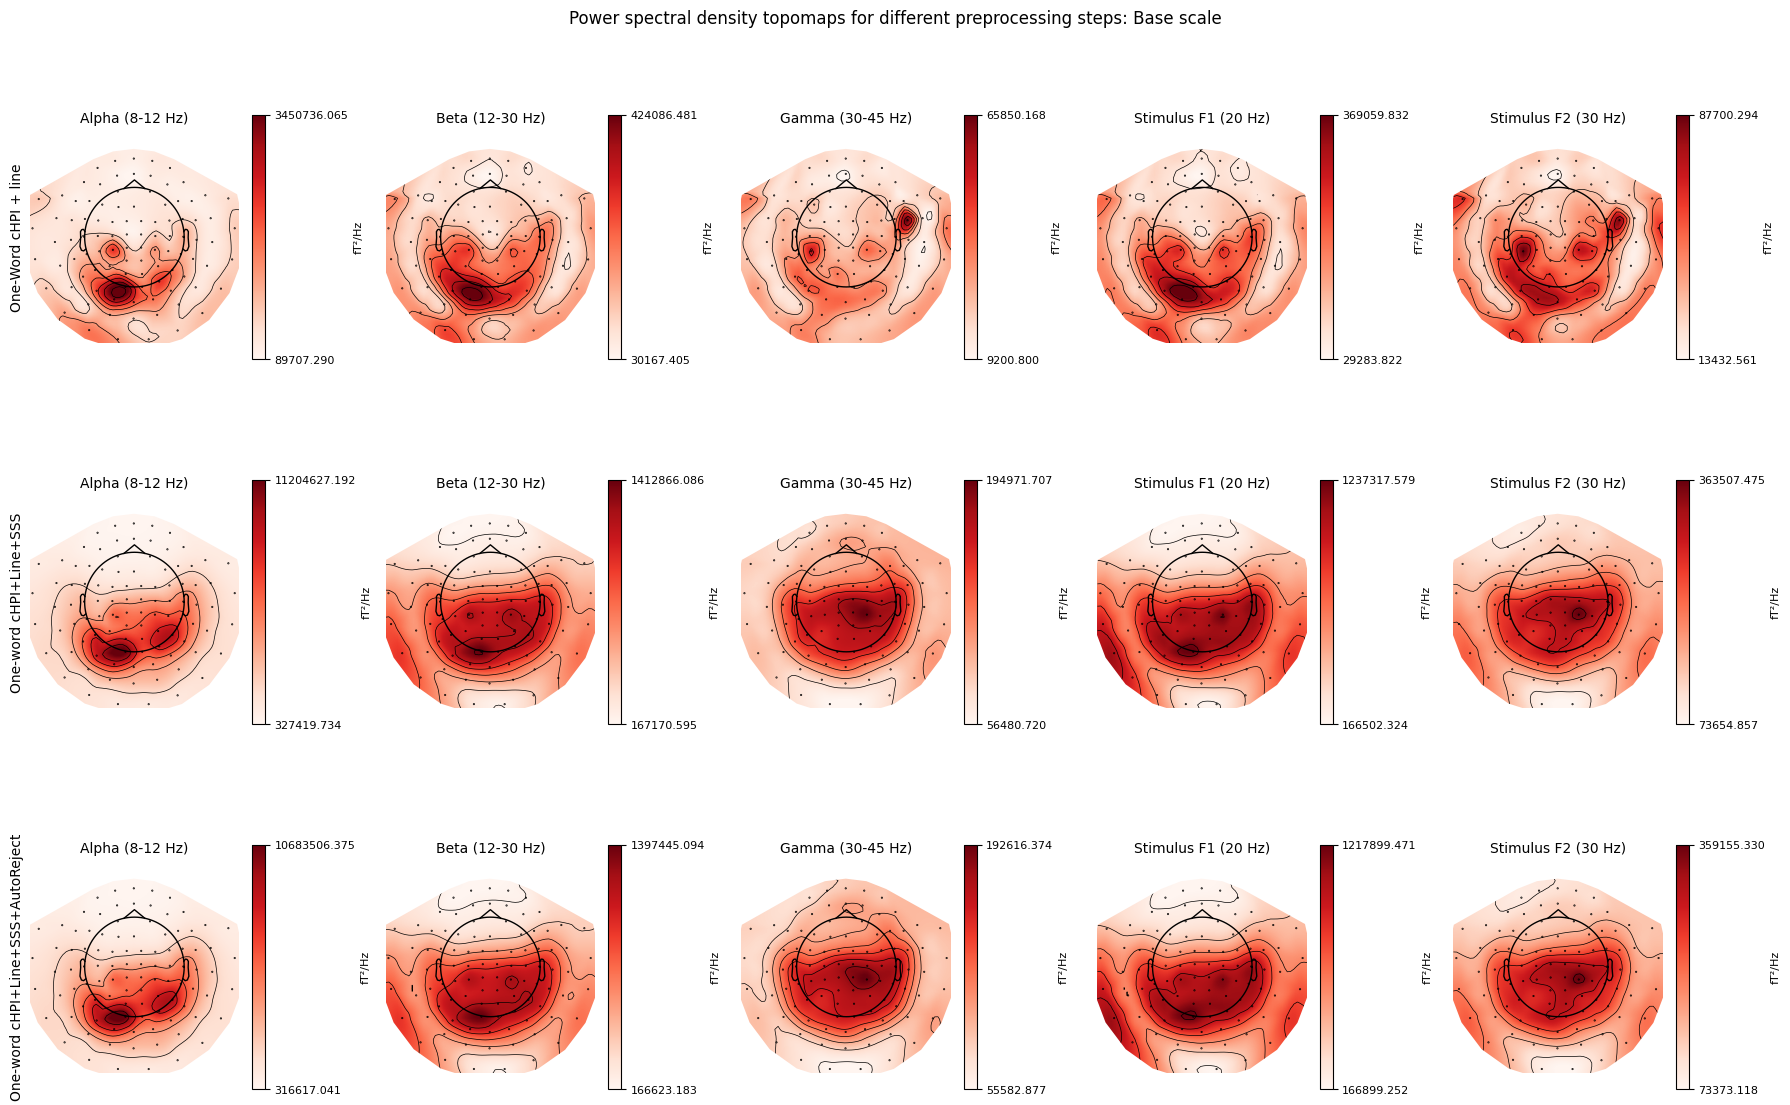

In [8]:
basebands = {"Alpha (8-12 Hz)": (8, 12), "Beta (12-30 Hz)": (12, 30), "Gamma (30-45 Hz)": (30, 45)}
basebands["Stimulus F1 (20 Hz)"] = (19, 21)
basebands["Stimulus F2 (30 Hz)"] = (29, 31)
fig, ax = plt.subplots(3, 5, figsize=(18, 12))
spect_chpiline.plot_topomap(bands=basebands, axes=ax[0])
spect_sss.plot_topomap(bands=basebands, axes=ax[1])
spect_arj.plot_topomap(bands=basebands, axes=ax[2])
ax[0, 0].set_ylabel("One-Word cHPI + line")
ax[1, 0].set_ylabel("One-word cHPI+Line+SSS")
ax[2, 0].set_ylabel("One-word cHPI+Line+SSS+AutoReject")
fig.suptitle("Power spectral density topomaps for different preprocessing steps: Base scale")
fig.tight_layout()

In [13]:
for ev in [evokeds_chpiline, evokeds_sss, evokeds_arj]:
    mne.viz.plot_compare_evokeds(ev, picks="meg")

NameError: name 'evokeds_sss' is not defined